In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)
x_train_scaled = (x_train - pixel_means) / pixel_stds
x_valid_scaled = (x_valid - pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds

## Faster Optimizers

In [3]:
# Momentum optimizaiton
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Nesterov Accelerated Gradient
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# AdaGrad
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

# RMSProp
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# Adam optimization
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Adamax optimization
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Nadam optimization
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling

Power Scheduling

In [4]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['acc'])

In [5]:
n_epochs=25

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, 
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4869 - acc: 0.8277 - val_loss: 0.4229 - val_acc: 0.8590
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3791 - acc: 0.8662 - val_loss: 0.3863 - val_acc: 0.8630
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3451 - acc: 0.8782 - val_loss: 0.3678 - val_acc: 0.8752
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3245 - acc: 0.8856 - val_loss: 0.3564 - val_acc: 0.8768
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3083 - acc: 0.8906 - val_loss: 0.3559 - val_acc: 0.8760
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2961 - acc: 0.8961 - val_loss: 0.3471 - val_acc: 0.8804
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2861 - acc: 0.8987 - val_loss: 0.3457 - val_acc: 0.8794
Epoch 8/25
1719/1719 [==============================] - 2s 1ms

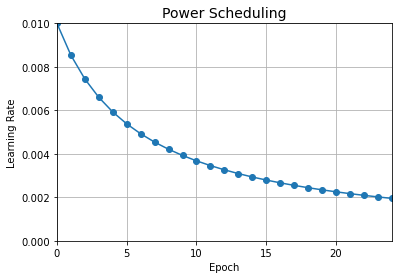

In [6]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(x_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, 'o-')
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Power Scheduling', fontsize=14)
plt.grid(True)
plt.show()

Exponential Scheduling

In [7]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

In [8]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.01 ** (epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='nadam', 
              metrics=['acc'])

n_epochs=25

In [10]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, 
                    validation_data=(x_valid_scaled, y_valid), 
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8340 - acc: 0.7593 - val_loss: 0.6795 - val_acc: 0.7886
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5928 - acc: 0.8162 - val_loss: 0.6020 - val_acc: 0.8322
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4994 - acc: 0.8420 - val_loss: 0.5184 - val_acc: 0.8284
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4320 - acc: 0.8583 - val_loss: 0.4902 - val_acc: 0.8518
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3814 - acc: 0.8732 - val_loss: 0.4597 - val_acc: 0.8784
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3395 - acc: 0.8833 - val_loss: 0.4651 - val_acc: 0.8574
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3016 - acc: 0.8945 - val_loss: 0.4156 - val_acc: 0.8662
Epoch 8/25
1719/1719 [==============================] - 3s 2ms

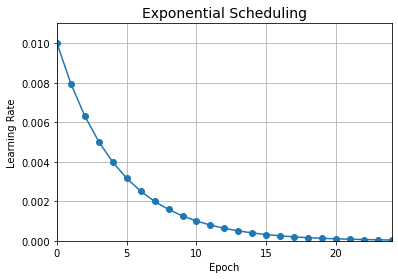

In [11]:
plt.plot(history.epoch, history.history['lr'], 'o-')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (1 / 20)

In [13]:
K = keras.backend


class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s
        
    def on_batch_begin(self, batch, logs=None):
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1 ** (1 / s))
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)
        

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
n_epochs = 25

s = 20 * len(x_train) // 32
exp_decay = ExponentialDecay(s)

history = model.fit(x_train_scaled, y_train, epochs=n_epochs, 
                    validation_data=(x_valid_scaled, y_valid), 
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8094 - acc: 0.7653 - val_loss: 0.6675 - val_acc: 0.8108
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6654 - acc: 0.8013 - val_loss: 0.6831 - val_acc: 0.7846
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5880 - acc: 0.8179 - val_loss: 0.6663 - val_acc: 0.7948
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4962 - acc: 0.8430 - val_loss: 0.7252 - val_acc: 0.8086
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4787 - acc: 0.8493 - val_loss: 0.5137 - val_acc: 0.8582
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4269 - acc: 0.8617 - val_loss: 0.5519 - val_acc: 0.8632
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3972 - acc: 0.8701 - val_loss: 0.5232 - val_acc: 0.8646
Epoch 8/25
1719/1719 [==============================] - 4s 2ms

In [14]:
n_steps = n_epochs * len(x_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1 ** (steps / s)

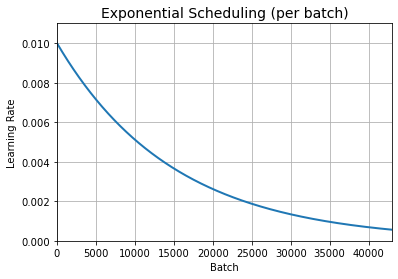

In [15]:
plt.plot(steps, lrs, '-', linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel('Batch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling (per batch)', fontsize=14)
plt.grid(True)
plt.show()